In [127]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

In [128]:
uni1=np.arange(0,100.1,0.1)#universe of all attributes

In [129]:
def attribute():#to create membership functions of attributes of mental work load
    ante={'low':fuzz.trimf(uni1,[0,0,32.9]),
          'medium lower':fuzz.trimf(uni1,[33,49.9,49.9]),
          'medium upper':fuzz.trimf(uni1,[50,50,66.9]),
         'high':fuzz.trimf(uni1,[70,100,100])}
    return ante

In [130]:
def zadeh(*args):#using zadeh fuzzy operator to calculate results of tnorm and tconorm
    return {'min':min(args),'max':max(args)}#min is tnorm, max is tconorm

In [131]:
def non_coex(r1,r2):
    if(r1>r2):
        r2=0
    else:
        r1=0
    return r1,r2

In [132]:
#creating all attributes
md=attribute()
eff=attribute()
td=attribute()
pf=attribute()
fr=attribute()

In [133]:
#to calculate neccessity of membership functions
def nec(a,x):
    c=int(x*10)
    return a['low'][c],a['medium lower'][c],a['medium upper'][c],a['high'][c]
    

In [134]:
#input in crisp values
mdIn=32.1
effIn=42.1
tdIn=52.1
pfIn=62.1
frIn=72.1


In [135]:
temp_md=nec(md,mdIn)
temp_eff=nec(eff,effIn)
temp_td=nec(td,tdIn)
temp_pf=nec(pf,pfIn)
temp_fr=nec(fr,frIn)

In [136]:
md1=temp_md[0]#temp_md[0]=nec(md['low']) which is present in antecedent of rule1
md2=temp_md[1]
md3=temp_md[2]
md4=temp_md[3]
td1=temp_td[0]
td2=temp_td[1]
td3=temp_td[2]
td4=temp_td[3]
ef1=temp_eff[0]
ef2=temp_eff[1]
ef3=temp_eff[2]
ef4=temp_eff[3]
pf1=temp_pf[0]
pf2=temp_pf[1]
pf3=temp_pf[2]
pf4=temp_pf[3]
fr1=temp_fr[0]#low
fr2=temp_fr[3]#high

In [137]:
#calculating truth values of rules using neccessities of diff attributes
rule1=zadeh(md1,1-fr2,1-ef4)['min']#if ef4 then not md1,fr2 and md1 cant coexist

In [138]:
rule2=md2
rule3=md3
rule4=zadeh(md4,1-fr1,1-ef1)['min']#fr1 and md4 cant coexist,ef1 and md4 cant coexist

In [139]:
rule5=zadeh(td1,1-fr2)['min']#td1-fr2 cant coexist
rule6=td2
rule7=td3
rule8=zadeh(td4,1-fr1)['min']#td4-fr1 cant coexist
rule9=zadeh(ef1,1-fr2,1-md4)['min']
rule10=ef2
rule11=ef3
rule12=zadeh(ef4,1-fr1)['min']
rule13=pf1
rule14=pf2
rule15=pf3
rule16=pf4
rule17=zadeh(fr1,1-pf1,1-md4,1-td4,1-ef4)['min']
rule18=zadeh(fr2,1-pf4,1-md1,1-td1)['min']

In [140]:
#calculating final degree of membership of each mwl member function in output
underload=zadeh(rule1,rule5,rule9,rule16,rule17)['max']

In [141]:
fit_low_load=zadeh(rule2,rule6,rule10,rule15)['max']
fit_up_load=zadeh(rule3,rule7,rule11,rule14)['max']
overload=zadeh(rule4,rule8,rule12,rule13,rule18)['max']

In [142]:
#print(underload,fit_low_load,fit_up_load,overload)


In [143]:
#to create mwl member functions
def mwl_levels():
    ante={'underload':fuzz.trimf(uni1,[0,0,32.9]),
          'fit low load':fuzz.trimf(uni1,[33,49.9,49.9]),
          'fit up load':fuzz.trimf(uni1,[50,50,66.9]),
         'overload':fuzz.trimf(uni1,[70,100,100])}
    return ante
    

In [144]:
#creating mwl member functions
mwl=mwl_levels()

In [145]:
#transforming the membership functions for final result
u_cap=np.minimum(underload,mwl['underload'])
fll_cap=np.minimum(fit_low_load,mwl['fit low load'])
ful_cap=np.minimum(fit_up_load,mwl['fit up load'])
o_cap=np.minimum(overload,mwl['overload'])

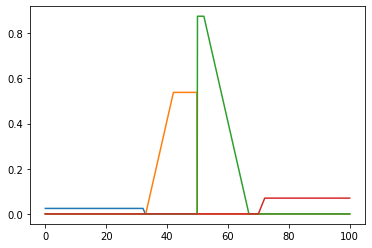

In [146]:
fig,ax=plt.subplots()
ax.plot(uni1,u_cap)
ax.plot(uni1,fll_cap)
ax.plot(uni1,ful_cap)
ax.plot(uni1,o_cap)

In [147]:
#creating final result
final=np.maximum.reduce([u_cap,fll_cap,ful_cap,o_cap])

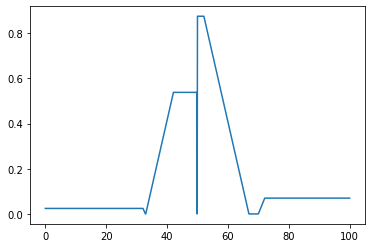

In [148]:
fig,ax=plt.subplots()
ax.plot(uni1,final)

In [149]:
#calculating final crisp value by defuzzification
result=fuzz.defuzz(uni1,final,'centroid')

In [150]:
result

52.765422173152224